# Objective

The goal is to recreate Fig 6.1 in Huterer. The figure shows freezout of particle species. As the universe expands particles are unable to find one another to annhilate. Therefore, their abundance (number density to entropie ratio) freezes out. Please recall that the Annhilation rate is $\Gamma = n \sigma v$ where $n$ is the number desnity, $\sigma v$ is the particle cross section. The hubble parameter scales as follows $H = T^2/m_{pl}$, so a larger cross section implies a lower freezeout abundance. 

# Approach
1) The equilibrium abundance $Y_{eq}$ can be calculated by integrating the boltzmann equation using scipy for various values of m and t.
$$n = \dfrac{g}{(2 \pi)^3} \int_{0}^{\inf} \dfrac{p^2}{exp(\sqrt{p^2+m^2}/T)-1} \,dp $$
2) The given differential equation describing the change in abundance $Y$ as a function of the mass temperature ration $x$ can be solved numerically using Odeint. 
$$\dfrac{dY}{dx} = - \dfrac{\lambda}{x^2} \left[Y^2-Y_{eq}^2 \right]$$ where we use the array of $Y_{eq}$ found in step one. 

3) Graphing the results of the two previous steps should yield Fig 6.1. 

The code used is given below.

In [2]:
#Importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from sympy import *
from scipy.integrate import odeint


In [90]:
def Boltzmann_eq(p,T,m):
    '''
    This function defines the boltzmann equation that needs to be integrated.
    p: pressure 
    T is temeperature
    m is mass 
    '''
    integrand = p**2/(np.exp(np.sqrt(p**2+m**2)/T)-1)
    return integrand

def Equilibrium_abundance(T,m,g):
    '''This function calculates the Equilibrium Abundance by integrating the Boltzmann equation
    T is temeperature
    m is mass 
    g is internal degrees of freedom
    '''
    result = quad(Boltzmann_eq,0, 10000000, args = (T,m))
    Value = ((g/(2*np.pi)**3)*result[0])/T**3
    return Value

In [55]:

x = np.linspace(1,100,10000)
def Yeq_list(xlist,m,g):
    '''This function calculates the Y_eq array
    xlist is a list of mass temperature ratios 
    m is mass 
    g is internal degrees of freedom'''
    Yeq = []
    for x1 in x:
        Yeq.append(Equilibrium_abundance(m/x1,m,g))
    return np.array(Yeq)



/tmp/ipykernel_63009/3741971270.py:8: RuntimeWarning: overflow encountered in exp
  integrand = p**2/(np.exp(np.sqrt(p**2+m**2)/T)-1)


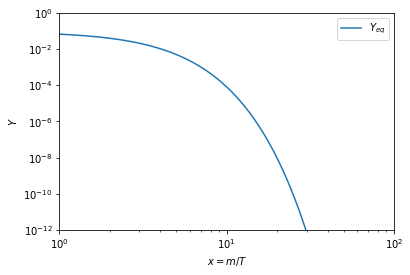

In [95]:
#This is a plot of the list of quilibrium abundance calculated by the function above. 
#The result found matches that of the plot. 
x = np.linspace(1,100,10000)
plt.loglog(x,Yeq_list(x,10**4,9),label = "$Y_{eq}$")
plt.xlim(1,100)
plt.ylim(10**-12,1)
#plt.loglog(x,y)
plt.xlabel('$x = m/T$')
plt.ylabel('$Y$')
plt.legend()
plt.show()


In [68]:
def model(y,x,L):
    '''This function represents the differential equation we are interested in solving 
    y is particle abundance
    x is the mass temperature ratio
    L is the constant lambda'''
    dydx = -L/x**2 * (y**2-Yeq_list(x,10**4,9)**2)
    return dydx

In [ ]:
# initial condition
y0 = 0.5*10**(-4)*np.ones(100)

# time points
x= np.linspace(1,100,100)

# solve ODE with given Lambdas
L= 10**5
y1= odeint(model,y0,x,args=(L,))
L = 10**7
y2= odeint(model,y0,x,args=(L,))
L = 10**9
y3= odeint(model,y0,x,args=(L,))


/tmp/ipykernel_63009/765777185.py:2: RuntimeWarning: overflow encountered in exp
  integrand = p**2/(np.exp(np.sqrt(p**2+m**2)/T)-1)


/tmp/ipykernel_63009/3741971270.py:8: RuntimeWarning: overflow encountered in exp
  integrand = p**2/(np.exp(np.sqrt(p**2+m**2)/T)-1)


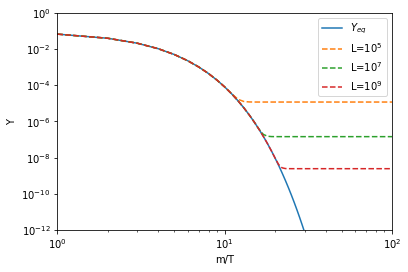

In [103]:
#This is the plot of the solutions of the ODEs and the equilibrium abundance. 
x = np.linspace(1,100,100)
x1= np.linspace(10,100,10000)
plt.loglog(x,Yeq_list(x,10**4,9),label = "$Y_{eq}$" )
plt.loglog(x,y1[2],label = "L=$10^5$",linestyle='dashed')
plt.loglog(x,y2[2],label = "L=$10^7$",linestyle='dashed')
plt.loglog(x,y3[2],label = "L=$10^9$",linestyle='dashed')
plt.xlim(1,100)
plt.ylim(10**-12,1)
#plt.loglog(x,y)
plt.xlabel('m/T')
plt.ylabel('Y')
plt.legend()
plt.show()